# Sistema de recompensas

In [2]:
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import set_random_seed
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score, max_error
from sklearn.linear_model import LinearRegression
# Time Series
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima

***Read Data***

In [3]:
data_series = pd.read_csv("../data/interim/bicimad_time_series.csv", sep=',')

In [34]:
X_train = pd.read_csv('../data/interim/bicimad_Xtrain_X.csv', sep=',')
X_test = pd.read_csv('../data/interim/bicimad_Xtest_X.csv', sep=',')
y_train = pd.read_csv('../data/interim/bicimad_ytrain_X.csv', sep=',')
y_test = pd.read_csv('../data/interim/bicimad_ytest_X.csv', sep=',')

# Neural Networks

In [16]:
set_random_seed(42)

model = Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model

In [18]:
model.fit(X_train, y_train, epochs = 50, batch_size = 10)

Epoch 1/50


/home/vscode/.local/lib/python3.11/site-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(10, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


4800/4800 [==============================] - 5s 883us/step - loss: nan - accuracy: 5.6250e-04
Epoch 2/50
4800/4800 [==============================] - 4s 848us/step - loss: nan - accuracy: 5.6250e-04
Epoch 3/50
4800/4800 [==============================] - 4s 875us/step - loss: nan - accuracy: 5.6250e-04
Epoch 4/50
4800/4800 [==============================] - 4s 873us/step - loss: nan - accuracy: 5.6250e-04
Epoch 5/50
4800/4800 [==============================] - 4s 863us/step - loss: nan - accuracy: 5.6250e-04
Epoch 6/50
4800/4800 [==============================] - 4s 833us/step - loss: nan - accuracy: 5.6250e-04
Epoch 7/50
4800/4800 [==============================] - 4s 866us/step - loss: nan - accuracy: 5.6250e-04
Epoch 8/50
4800/4800 [==============================] - 4s 868us/step - loss: nan - accuracy: 5.6250e-04
Epoch 9/50
4800/4800 [==============================] - 4s 876us/step - loss: nan - accuracy: 5.6250e-04
Epoch 10/50
4800/4800 [==============================] - 4s 870us/

In [19]:
_, accuracy = model.evaluate(X_train, y_train)

print(f"Accuracy: {accuracy}")

   1/1500 [..............................] - ETA: 2:39 - loss: nan - accuracy: 0.0000e+00

 117/1500 [=>............................] - ETA: 1s - loss: nan - accuracy: 0.0011     

/home/vscode/.local/lib/python3.11/site-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1500/1500 [==============================] - 1s 807us/step - loss: nan - accuracy: 5.6250e-04
Accuracy: 0.0005624999757856131


In [20]:
y_pred = model.predict(X_test)
y_pred[:15]

 71/375 [====>.........................] - ETA: 0s 

375/375 [==============================] - 0s 734us/step


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [21]:
y_pred_round = [round(x[0]) for x in y_pred]
y_pred_round[:15]

ValueError: cannot convert float NaN to integer

In [22]:
accuracy_score(y_test, y_pred_round)

NameError: name 'y_pred_round' is not defined

# Decission Tree

In [33]:
model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, y_train)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>)

In [26]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

KeyboardInterrupt: 

In [41]:
y_pred = model.predict(X_test)
y_pred

array([  6., 118.,  93., ..., 113.,  22.,  23.])

In [42]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")

Error cuadrático medio: 2376.4192377495465


In [43]:
max_error(y_test, y_pred)

116.0

In [45]:
y_test

,trip_minutes
0,52
1,89
2,28
3,39
4,6
...,...
1097,119
1098,25
1099,39
1100,15


# Linear Regression

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): [54.54760501]
Coeficientes (b): [[ 0.00089707  0.0759325  -0.06778498  0.00869273 -0.0910053   0.04749374
   0.12771111  0.04749374 -0.00087297]]


In [50]:
y_pred = model.predict(X_test)
y_pred

array([[60.13001693],
       [59.47833631],
       [58.48346375],
       ...,
       [56.42877508],
       [62.17418275],
       [61.43944602]])

In [52]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 1182.843519767521
Coeficiente de determinación: -0.00840069531386578


# Time Series

In [4]:
data_series = data_series.set_index("unlock_date")
ts = data_series["trip_minutes"]

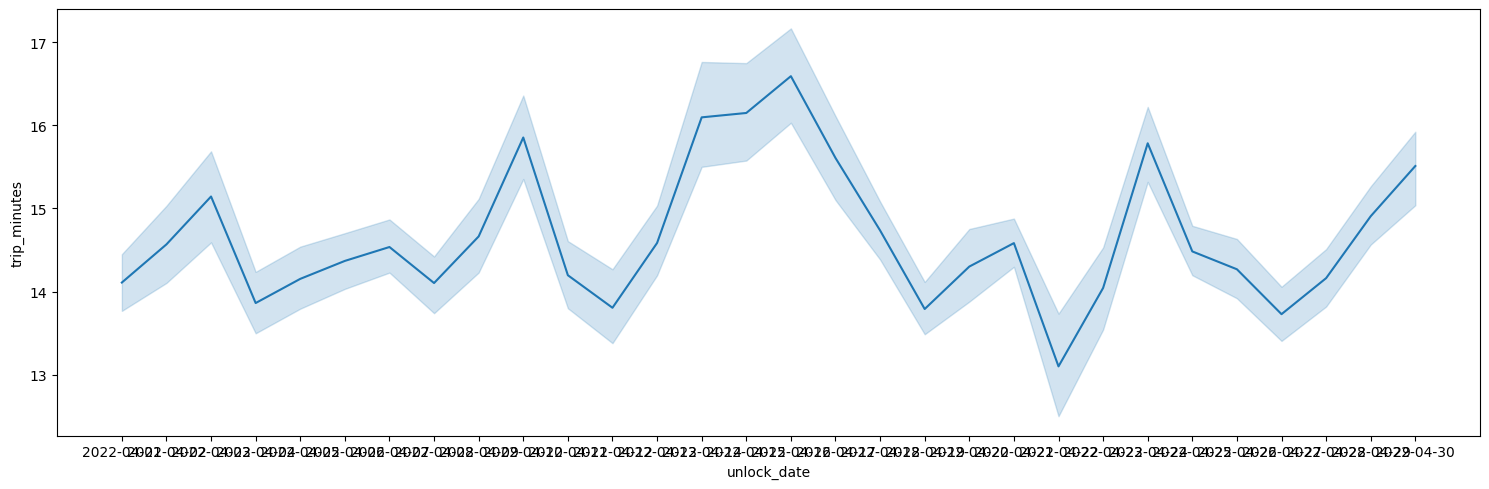

In [5]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.lineplot(data = ts, ax=ax)

plt.tight_layout()
plt.show()

In [6]:
decomposition = seasonal_decompose(ts, period = 12)
decomposition

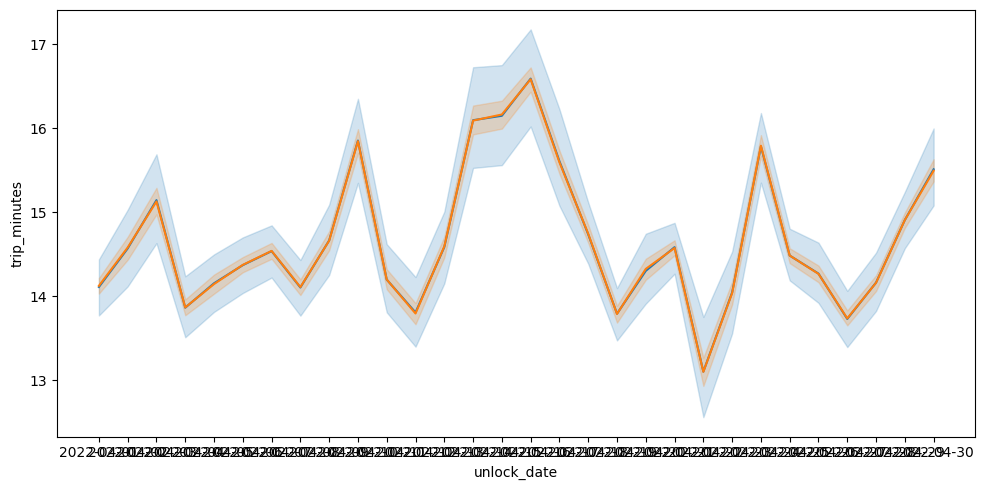

In [7]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

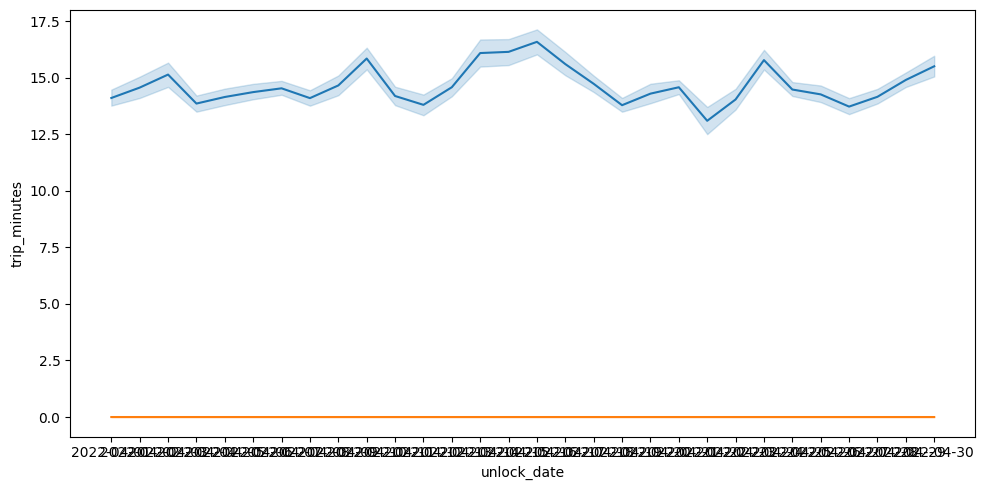

In [8]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [9]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   -28.445932
p-value                            0.000000
#Lags Used                        54.000000
Number of Observations Used    59945.000000
Critical Value (1%)               -3.430459
Critical Value (5%)               -2.861588
Critical Value (10%)              -2.566796
dtype: float64

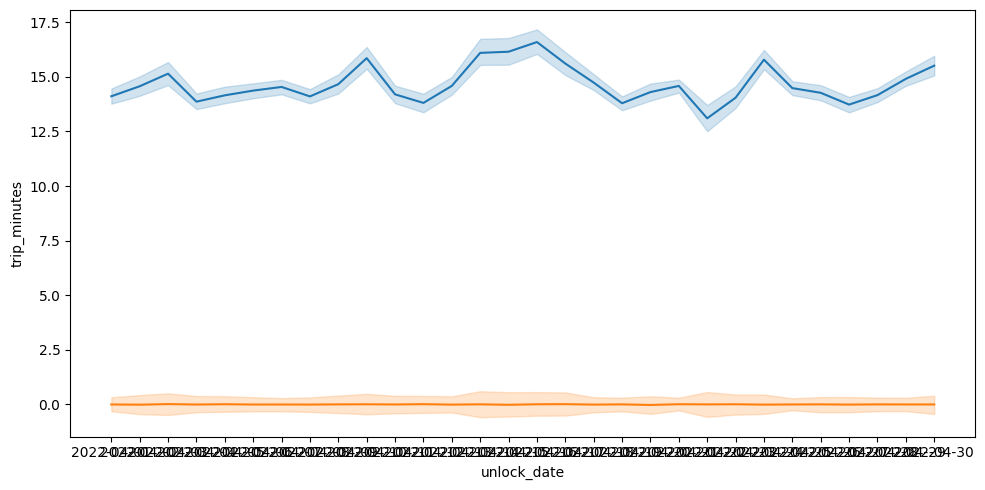

In [10]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

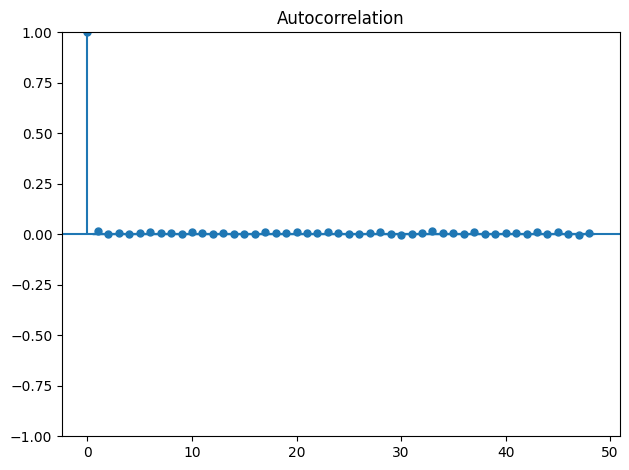

In [11]:
plot_acf(ts)

plt.tight_layout()

plt.show()

In [12]:
ts_stationary = ts.diff().dropna()

test_stationarity(ts_stationary)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   -54.638053
p-value                            0.000000
#Lags Used                        60.000000
Number of Observations Used    59938.000000
Critical Value (1%)               -3.430459
Critical Value (5%)               -2.861588
Critical Value (10%)              -2.566796
dtype: float64

In [13]:
model = auto_arima(ts_stationary, seasonal = True, trace = True, m = 12, max_order=2)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=115.06 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=476722.731, Time=0.94 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=459969.567, Time=6.50 sec


: 

In [16]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
forecast = model.predict(12)
forecast

In [ ]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_stationary)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()